<a href="https://colab.research.google.com/github/saihaneesh26/ML-projects/blob/main/BA_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#multiple dataset sources
dataset_url1 = "https://raw.githubusercontent.com/hritikb/Trend-Analysis-on-GitHub/main/Popular%20Programming%20Languages/Github_repo_data_2019.csv"
dataset_url2 = "https://raw.githubusercontent.com/hritikb/Trend-Analysis-on-GitHub/main/Popular%20Programming%20Languages/Github_repo_data_2020.csv"
dataset_url3 = "https://raw.githubusercontent.com/hritikb/Trend-Analysis-on-GitHub/main/Popular%20Programming%20Languages/Github_repo_data_2021.csv"

In [ ]:

#load dataset from CSV files to pandas data frame
df1 = pd.read_csv(dataset_url1)
df2 = pd.read_csv(dataset_url2)
df3 = pd.read_csv(dataset_url3)

In [ ]:
print(f"shape of df1:{df1.shape}\nshape of df2:{df2.shape}\nshape of df3:{df3.shape}")

shape of df1:(1000, 97)
shape of df2:(1000, 97)
shape of df3:(1000, 97)


In [ ]:
#concat data from multiple sources
df = pd.concat([df1, df2, df3])
print(f"shape of total df:{df.shape}")

shape of total df:(3000, 97)


In [ ]:
#info of df
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
1,1,189621607,MDEwOlJlcG9zaXRvcnkxODk2MjE2MDc=,docs,github/docs,False,https://github.com/github/docs,The open-source repo for docs.github.com,False,https://api.github.com/repos/github/docs,...,https://api.github.com/users/github/events{/pr...,https://api.github.com/users/github/received_e...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2,2,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
3,3,212094940,MDEwOlJlcG9zaXRvcnkyMTIwOTQ5NDA=,DO180-apps,RedHatTraining/DO180-apps,False,https://github.com/RedHatTraining/DO180-apps,DO180 Repository for Sample Applications,False,https://api.github.com/repos/RedHatTraining/DO...,...,https://api.github.com/users/RedHatTraining/ev...,https://api.github.com/users/RedHatTraining/re...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,177216275,MDEwOlJlcG9zaXRvcnkxNzcyMTYyNzU=,mslearn-tailspin-spacegame-web,MicrosoftDocs/mslearn-tailspin-spacegame-web,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,https://api.github.com/users/MicrosoftDocs/eve...,https://api.github.com/users/MicrosoftDocs/rec...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 97 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3000 non-null   int64  
 1   id                         3000 non-null   int64  
 2   node_id                    3000 non-null   object 
 3   name                       3000 non-null   object 
 4   full_name                  3000 non-null   object 
 5   private                    3000 non-null   bool   
 6   html_url                   3000 non-null   object 
 7   description                2125 non-null   object 
 8   fork                       3000 non-null   bool   
 9   url                        3000 non-null   object 
 10  forks_url                  3000 non-null   object 
 11  keys_url                   3000 non-null   object 
 12  collaborators_url          3000 non-null   object 
 13  teams_url                  3000 non-null   object

In [ ]:

#drop NaN values as the number of NA rows are less compared to length of dataset
df = df.dropna()

In [ ]:
# 'created_at' contains the information regarding when was the repo made but in str form
# We will use pd.to_datetime to convert it into a Date Time Object

df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index('created_at')

In [ ]:

df.head()


,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
created_at,,,,,,,,,,,,,,,,,,,,,
2019-03-26 07:31:14+00:00,0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2019-05-31 15:57:39+00:00,1,189621607,MDEwOlJlcG9zaXRvcnkxODk2MjE2MDc=,docs,github/docs,False,https://github.com/github/docs,The open-source repo for docs.github.com,False,https://api.github.com/repos/github/docs,...,https://api.github.com/users/github/events{/pr...,https://api.github.com/users/github/received_e...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2019-12-17 19:04:12+00:00,2,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
2019-10-01 12:50:51+00:00,3,212094940,MDEwOlJlcG9zaXRvcnkyMTIwOTQ5NDA=,DO180-apps,RedHatTraining/DO180-apps,False,https://github.com/RedHatTraining/DO180-apps,DO180 Repository for Sample Applications,False,https://api.github.com/repos/RedHatTraining/DO...,...,https://api.github.com/users/RedHatTraining/ev...,https://api.github.com/users/RedHatTraining/re...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22 22:20:37+00:00,4,177216275,MDEwOlJlcG9zaXRvcnkxNzcyMTYyNzU=,mslearn-tailspin-spacegame-web,MicrosoftDocs/mslearn-tailspin-spacegame-web,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,https://api.github.com/users/MicrosoftDocs/eve...,https://api.github.com/users/MicrosoftDocs/rec...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN


In [ ]:
#number of scripts in different languages in years 2019,20,21
dx = pd.DataFrame(df.groupby(['language', df.index.year]).id.count())
dx.head()

id
language   created_at    
AGS Script 2020         2
Assembly   2020         1
           2021         3
Batchfile  2020         2
           2021        19

In [ ]:
languages_id = df.groupby(['language', df.index.year]).id.count().index
ids = df.groupby(['language', df.index.year]).id.count()
print(languages_id[:2])

MultiIndex([('AGS Script', 2020),
            (  'Assembly', 2020)],
           names=['language', 'created_at'])


In [ ]:
dx = pd.DataFrame(columns=['language','created_at','scripts'])
for i in range(0,len(ids)):
  dx = dx.append(pd.DataFrame([[languages_id[i][0],languages_id[i][1],ids[i]]],columns=['language','created_at','scripts']),ignore_index=True)
dx

,language,created_at,scripts
0,AGS Script,2020,2
1,Assembly,2020,1
2,Assembly,2021,3
3,Batchfile,2020,2
4,Batchfile,2021,19
...,...,...,...
119,Vue,2020,11
120,Vue,2021,9
121,XSLT,2019,1
122,YAML,2021,1


In [ ]:
dx.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   language    124 non-null    object
 1   created_at  124 non-null    object
 2   scripts     124 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


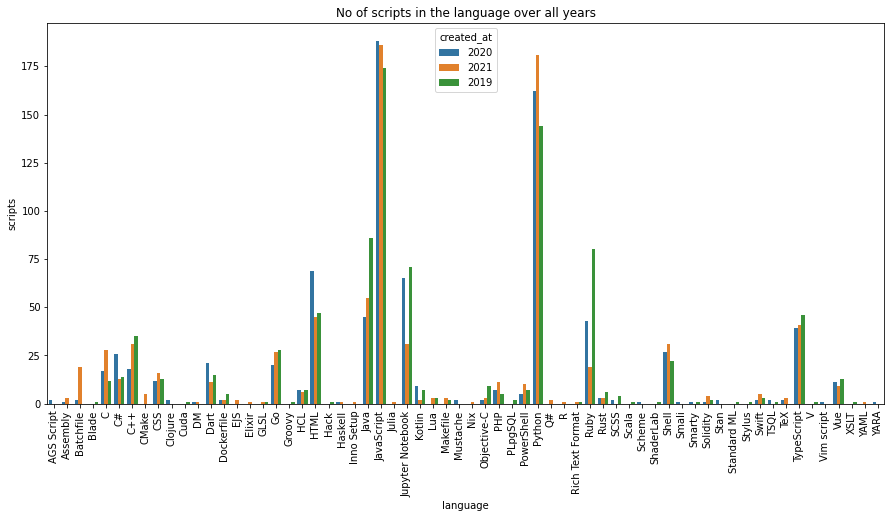

In [ ]:
plt.figure(figsize=(15,7))
plt.title("No of scripts in the language over all years")
plt.xticks(rotation = 90)
sns.barplot(x=dx.language.astype('str'),y=dx.scripts.astype('int'),hue=dx.created_at.astype("str"))
plt.show()

In [ ]:
#inference : the scripts in langauge of javascript and python are more popular over years 2019,2020,2021 over all other scripts